<a href="https://colab.research.google.com/github/Kazureee/sunflower-exp-efficiency/blob/main/sunflower_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests

def get_prices():
    url = "https://sfl.world/api/v1/prices"
    resp = requests.get(url)
    resp.raise_for_status()
    return resp.json()

if __name__ == "__main__":
    data = get_prices()
    print(data)

recipes = [
    # Fire Pit (17)
    {"Food": "Boiled Eggs", "Ingredients": {"Egg": 10}, "XP": 90},
    {"Food": "Gumbo", "Ingredients": {"Potato": 50, "Pumpkin": 30, "Carrot": 20, "Red Snapper": 3}, "XP": 600},
    {"Food": "Kale Stew", "Ingredients": {"Kale": 10}, "XP": 400},
    {"Food": "Fried Tofu", "Ingredients": {"Soybean": 15, "Sunflower": 200}, "XP": 400},
    {"Food": "Bumpkin Broth", "Ingredients": {"Carrot": 10, "Cabbage": 5}, "XP": 300},
    {"Food": "Rhubarb Tart", "Ingredients": {"Rhubarb": 3}, "XP": 5},
    {"Food": "Mushroom Soup", "Ingredients": {"Wild Mushroom": 5}, "XP": 56},
    {"Food": "Kale Omelette", "Ingredients": {"Egg": 40, "Kale": 5}, "XP": 1250},
    {"Food": "Mashed Potato", "Ingredients": {"Potato": 8}, "XP": 3},
    {"Food": "Cabbers n Mash", "Ingredients": {"Mashed Potato": 10, "Cabbage": 20}, "XP": 250},
    {"Food": "Reindeer Carrot", "Ingredients": {"Carrot": 5}, "XP": 36},
    {"Food": "Pumpkin Soup", "Ingredients": {"Pumpkin": 10}, "XP": 24},
    {"Food": "Rice Bun", "Ingredients": {"Rice": 2, "Wheat": 50}, "XP": 2800},
    {"Food": "Popcorn", "Ingredients": {"Sunflower": 100, "Corn": 5}, "XP": 255},
    {"Food": "Antipasto", "Ingredients": {"Olive": 2, "Grape": 2}, "XP": 3000},
    {"Food": "Pizza Margherita", "Ingredients": {"Tomato": 30, "Cheese": 5, "Wheat": 20}, "XP": 2500},
    {"Food": "Rapid Roast", "Ingredients": {"Magic Mushroom": 1, "Pumpkin": 40}, "XP": 300},

    # Kitchen (25)
    {"Food": "Beetroot Blaze", "Ingredients": {"Magic Mushroom": 2, "Beetroot": 50}, "XP": 2000},
    {"Food": "Sushi Roll", "Ingredients": {"Angelfish": 1, "Seaweed": 1, "Rice": 2}, "XP": 2000},
    {"Food": "Caprese Salad", "Ingredients": {"Cheese": 1, "Tomato": 25, "Kale": 20}, "XP": 6000},
    {"Food": "Mushroom Jacket Potatoes", "Ingredients": {"Wild Mushroom": 10, "Potato": 5}, "XP": 240},
    {"Food": "Pancakes", "Ingredients": {"Wheat": 10, "Egg": 10, "Honey": 6}, "XP": 1000},
    {"Food": "Ocean's Olive", "Ingredients": {"Olive Flounder": 1, "Olive": 2}, "XP": 2000},
    {"Food": "Spaghetti al Limone", "Ingredients": {"Wheat": 10, "Lemon": 15, "Cheese": 3}, "XP": 15000},
    {"Food": "Steamed Red Rice", "Ingredients": {"Rice": 3, "Beetroot": 50}, "XP": 3000},
    {"Food": "Fish Burger", "Ingredients": {"Beetroot": 10, "Wheat": 10, "Horse Mackerel": 1}, "XP": 1300},
    {"Food": "Fish n Chips", "Ingredients": {"Fancy Fries": 1, "Halibut": 1}, "XP": 2000},
    {"Food": "Fruit Salad", "Ingredients": {"Apple": 1, "Orange": 1, "Blueberry": 1}, "XP": 225},
    {"Food": "Seafood Basket", "Ingredients": {"Blowfish": 2, "Napoleanfish": 2, "Sunfish": 2}, "XP": 2200},
    {"Food": "Tofu Scramble", "Ingredients": {"Soybean": 20, "Egg": 20, "Cauliflower": 10}, "XP": 1000},
    {"Food": "Sunflower Crunch", "Ingredients": {"Sunflower": 300}, "XP": 50},
    {"Food": "Fried Calamari", "Ingredients": {"Sunflower": 200, "Wheat": 15, "Squid": 1}, "XP": 1500},
    {"Food": "Fish Omelette", "Ingredients": {"Egg": 40, "Surgeonfish": 1, "Butterflyfish": 2}, "XP": 1500},
    {"Food": "Bumpkin Roast", "Ingredients": {"Mashed Potato": 20, "Roast Veggies": 5}, "XP": 2500},
    {"Food": "Goblin Brunch", "Ingredients": {"Boiled Eggs": 5, "Goblin's Treat": 1}, "XP": 2500},
    {"Food": "Bumpkin ganoush", "Ingredients": {"Eggplant": 30, "Potato": 50, "Parsnip": 10}, "XP": 1000},
    {"Food": "Chowder", "Ingredients": {"Beetroot": 10, "Wheat": 10, "Parsnip": 5, "Anchovy": 3}, "XP": 170},
    {"Food": "Roast Veggies", "Ingredients": {"Cauliflower": 15, "Carrot": 10}, "XP": 170},
    {"Food": "Cauliflower Burger", "Ingredients": {"Cauliflower": 15, "Wheat": 5}, "XP": 255},
    {"Food": "Goblin's Treat", "Ingredients": {"Pumpkin": 10, "Radish": 20, "Cabbage": 10}, "XP": 500},
    {"Food": "Bumpkin Salad", "Ingredients": {"Beetroot": 20, "Parsnip": 10}, "XP": 260},
    {"Food": "Club Sandwich", "Ingredients": {"Sunflower": 100, "Carrot": 25, "Wheat": 5}, "XP": 170},

    # Deli (9)
    {"Food": "Shroom Syrup", "Ingredients": {"Magic Mushroom": 3, "Honey": 20}, "XP": 10000},
    {"Food": "Blue Cheese", "Ingredients": {"Cheese": 2, "Blueberry": 10}, "XP": 6000},
    {"Food": "Honey Cheddar", "Ingredients": {"Cheese": 3, "Honey": 5}, "XP": 15000},
    {"Food": "Fermented Fish", "Ingredients": {"Tuna": 6}, "XP": 3000},
    {"Food": "Blueberry Jam", "Ingredients": {"Blueberry": 5}, "XP": 500},
    {"Food": "Fancy Fries", "Ingredients": {"Sunflower": 500, "Potato": 500}, "XP": 1000},
    {"Food": "Sauerkraut", "Ingredients": {"Cabbage": 20}, "XP": 500},
    {"Food": "Fermented Carrots", "Ingredients": {"Carrot": 20}, "XP": 250},
    {"Food": "Cheese", "Ingredients": {"Milk": 3}, "XP": 1},

    # Smoothie Shack (12)
    {"Food": "Grape Juice", "Ingredients": {"Grape": 5, "Radish": 20}, "XP": 3300},
    {"Food": "Sour Shake", "Ingredients": {"Lemon": 20}, "XP": 1000},
    {"Food": "Purple Smoothie", "Ingredients": {"Blueberry": 5, "Cabbage": 10}, "XP": 310},
    {"Food": "Power Smoothie", "Ingredients": {"Blueberry": 10, "Kale": 5}, "XP": 775},
    {"Food": "Orange Juice", "Ingredients": {"Orange": 5}, "XP": 375},
    {"Food": "Apple Juice", "Ingredients": {"Apple": 5}, "XP": 500},
    {"Food": "Bumpkin Detox", "Ingredients": {"Apple": 5, "Orange": 5, "Carrot": 10}, "XP": 975},
    {"Food": "The Lot", "Ingredients": {"Blueberry": 1, "Orange": 1, "Grape": 1, "Apple": 1, "Banana": 1}, "XP": 1500},
    {"Food": "Banana Blast", "Ingredients": {"Banana": 10, "Egg": 10}, "XP": 1200},
    {"Food": "Slow Juice", "Ingredients": {"Grape": 10, "Kale": 100}, "XP": 7500},
    {"Food": "Carrot Juice", "Ingredients": {"Carrot": 30}, "XP": 200},
    {"Food": "Quick Juice", "Ingredients": {"Sunflower": 50, "Pumpkin": 40}, "XP": 100},

    # Bakery (17)
    {"Food": "Lemon Cheesecake", "Ingredients": {"Lemon": 20, "Cheese": 5, "Egg": 40}, "XP": 30000},
    {"Food": "Honey Cake", "Ingredients": {"Honey": 10, "Wheat": 10, "Egg": 20}, "XP": 4000},
    {"Food": "Orange Cake", "Ingredients": {"Orange": 5, "Egg": 30, "Wheat": 10}, "XP": 730},
    {"Food": "Apple Pie", "Ingredients": {"Apple": 5, "Wheat": 10, "Egg": 20}, "XP": 720},
    {"Food": "Kale & Mushroom Pie", "Ingredients": {"Wild Mushroom": 10, "Kale": 5, "Wheat": 5}, "XP": 720},
    {"Food": "Sunflower Cake", "Ingredients": {"Sunflower": 1000, "Wheat": 10, "Egg": 30}, "XP": 525},
    {"Food": "Potato Cake", "Ingredients": {"Potato": 500, "Wheat": 10, "Egg": 30}, "XP": 650},
    {"Food": "Pumpkin Cake", "Ingredients": {"Pumpkin": 130, "Wheat": 10, "Egg": 30}, "XP": 625},
    {"Food": "Eggplant Cake", "Ingredients": {"Eggplant": 30, "Wheat": 10, "Egg": 30}, "XP": 1400},
    {"Food": "Carrot Cake", "Ingredients": {"Carrot": 120, "Wheat": 10, "Egg": 30}, "XP": 750},
    {"Food": "Cabbage Cake", "Ingredients": {"Cabbage": 90, "Wheat": 10, "Egg": 30}, "XP": 860},
    {"Food": "Beetroot Cake", "Ingredients": {"Beetroot": 100, "Wheat": 10, "Egg": 30}, "XP": 1300},
    {"Food": "Parsnip Cake", "Ingredients": {"Parsnip": 45, "Wheat": 10, "Egg": 30}, "XP": 1300},
    {"Food": "Cauliflower Cake", "Ingredients": {"Cauliflower": 60, "Wheat": 10, "Egg": 30}, "XP": 1100},
    {"Food": "Cornbread", "Ingredients": {"Corn": 15, "Wheat": 5, "Egg": 10}, "XP": 600},
    {"Food": "Radish Cake", "Ingredients": {"Radish": 25, "Wheat": 10, "Egg": 30}, "XP": 1200},
    {"Food": "Wheat Cake", "Ingredients": {"Wheat": 35, "Egg": 30}, "XP": 1100}
]

{'data': {'p2p': {'Sunflower': 0.00025455, 'Potato': 0.00039875, 'Pumpkin': 0.00164942, 'Carrot': 0.0023, 'Cabbage': 0.0015975, 'Beetroot': 0.0055985, 'Cauliflower': 0.006, 'Parsnip': 0.0185, 'Radish': 0.01498115, 'Wheat': 0.018, 'Kale': 0.038692, 'Apple': 0.0248, 'Blueberry': 0.019, 'Orange': 0.01783636, 'Eggplant': 0.01038, 'Corn': 0.03499966, 'Banana': 0.02407692, 'Soybean': 0.0025, 'Grape': 0.34984, 'Rice': 0.60748, 'Olive': 0.67398, 'Tomato': 0.0041975, 'Lemon': 0.01193529, 'Barley': 0.039686, 'Rhubarb': 0.00054525, 'Zucchini': 0.000783, 'Yam': 0.0043, 'Broccoli': 0.002993, 'Pepper': 0.005325, 'Onion': 0.018275, 'Turnip': 0.009, 'Artichoke': 0.01347, 'Duskberry': 1.11398, 'Lunara': 0.709, 'Celestine': 0.1969375, 'Wood': 0.01073, 'Stone': 0.019729, 'Iron': 0.07274, 'Gold': 0.285525, 'Egg': 0.0239945, 'Honey': 0.1171, 'Crimstone': 0.68, 'Leather': 0.23045, 'Wool': 0.08748, 'Merino Wool': 0.0331, 'Feather': 0.01398875, 'Milk': 0.14895714, 'Obsidian': 34.99, 'Goblin Emblem': 0.0715, '

In [9]:
import pandas as pd

# Extract the p2p prices from the data dictionary
price_dict = data['data']['p2p']

# 1. Precompute total price per food (for ingredients that are other foods)
food_total_price = {}
for recipe in recipes:
    total_price = 0
    for ing, qty in recipe["Ingredients"].items():
        price = price_dict.get(ing)
        if price is None:
            # If ingredient is another food, we’ll fill later
            price = 0
        total_price += price * qty
    food_total_price[recipe["Food"]] = total_price

# 2. Build display table
rows_display = []
for recipe in recipes:
    ingredients = recipe["Ingredients"]
    total_price_food = sum(
        price_dict.get(ing, 0)*qty if ing in price_dict else food_total_price.get(ing, 0)*qty
        for ing, qty in ingredients.items()
    )
    first = True
    for ing, qty in ingredients.items():
        if ing in price_dict:
            price_per_unit = price_dict[ing]
        elif ing in food_total_price:
            # Ingredient is another food
            price_per_unit = food_total_price[ing]
        else:
            price_per_unit = "NA"

        total_price_ing = qty * price_per_unit if isinstance(price_per_unit, (int, float)) else "NA"

        rows_display.append({
            "Food": recipe["Food"] if first else "",
            "Ingredient": ing,
            "Ingredients_qty": qty,
            "Price_per_unit": price_per_unit,
            "Total_price_per_ingredient": total_price_ing,
            "Total_price_per_food": total_price_food if first else "",
            "Base_Experience": recipe["XP"] if first else "",
            "Experience_15%": recipe["XP"]*1.15 if first else ""
        })
        first = False

df_final = pd.DataFrame(rows_display)

# 3. Display nicely
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.6f}'.format)
df_final

,Food,Ingredient,Ingredients_qty,Price_per_unit,Total_price_per_ingredient,Total_price_per_food,Base_Experience,Experience_15%
0,Boiled Eggs,Egg,10,0.023994,0.239945,0.239945,90,103.500000
1,Gumbo,Potato,50,0.000399,0.019938,0.115420,600,690.000000
2,,Pumpkin,30,0.001649,0.049483,,,
3,,Carrot,20,0.002300,0.046000,,,
4,,Red Snapper,3,NA,NA,,,
5,Kale Stew,Kale,10,0.038692,0.386920,0.386920,400,460.000000
6,Fried Tofu,Soybean,15,0.002500,0.037500,0.088410,400,460.000000
7,,Sunflower,200,0.000255,0.050910,,,
8,Bumpkin Broth,Carrot,10,0.002300,0.023000,0.030988,300,345.000000
9,,Cabbage,5,0.001597,0.007987,,,


In [17]:
# Check for missing values
print(df_final.isnull().sum())

# Check data types
print(df_final.dtypes)

# Convert 'Total_price_per_food' to numeric, coercing errors and filling NA/empty strings with 0
df_final['Total_price_per_food'] = pd.to_numeric(df_final['Total_price_per_food'], errors='coerce').fillna(0)

# Identify outliers using IQR
Q1 = df_final['Total_price_per_food'].quantile(0.25)
Q3 = df_final['Total_price_per_food'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_final[(df_final['Total_price_per_food'] < (Q1 - 1.5 * IQR)) | (df_final['Total_price_per_food'] > (Q3 + 1.5 * IQR))]
print(outliers)

Food                          0
Ingredient                    0
Ingredients_qty               0
Price_per_unit                0
Total_price_per_ingredient    0
Total_price_per_food          0
Base_Experience               0
Experience_15%                0
dtype: int64
Food                          object
Ingredient                    object
Ingredients_qty                int64
Price_per_unit                object
Total_price_per_ingredient    object
Total_price_per_food          object
Base_Experience               object
Experience_15%                object
dtype: object
                    Food      Ingredient  Ingredients_qty Price_per_unit  \
12         Kale Omelette             Egg               40       0.023994   
19              Rice Bun            Rice                2       0.607480   
23             Antipasto           Olive                2       0.673980   
25      Pizza Margherita          Tomato               30       0.004197   
32            Sushi Roll       Angelfish 

       Ingredients_qty  Price_per_unit  Total_price_per_ingredient  \
count       181.000000      181.000000                  181.000000   
mean         34.447514        0.059853                    0.359329   
std         101.240658        0.138697                    0.565670   
min           1.000000        0.000000                    0.000000   
25%           5.000000        0.001649                    0.031950   
50%          10.000000        0.018000                    0.180000   
75%          25.000000        0.023994                    0.446871   
max        1000.000000        0.673980                    3.869200   

       Total_price_per_food  Base_Experience  Experience_15%  
count            181.000000       181.000000      181.000000  
mean               0.359329       897.099448     1031.664365  
std                0.810544      2951.551118     3394.283786  
min                0.000000         0.000000        0.000000  
25%                0.000000         0.000000        0.

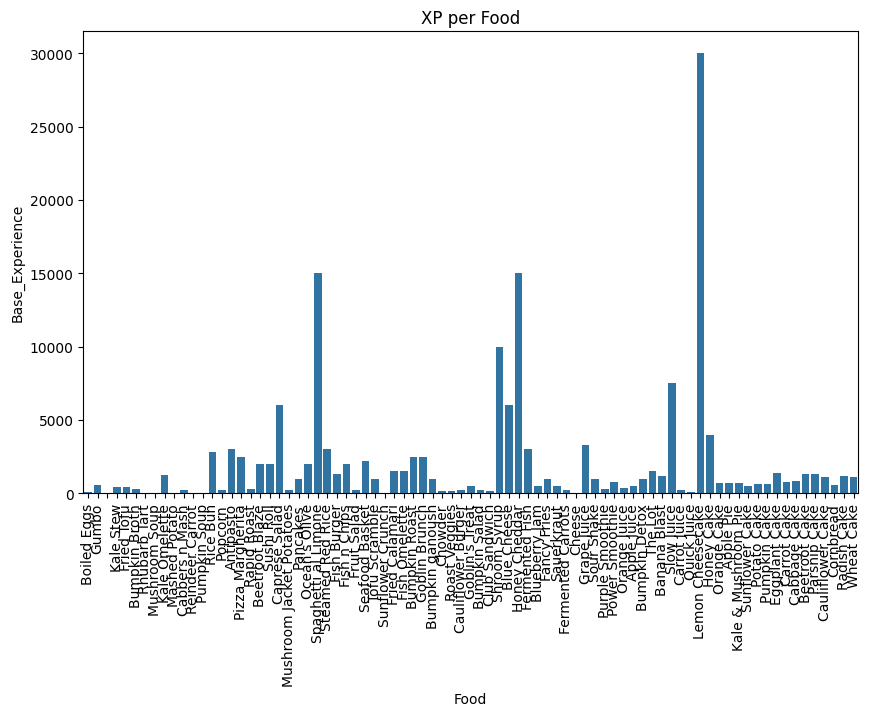

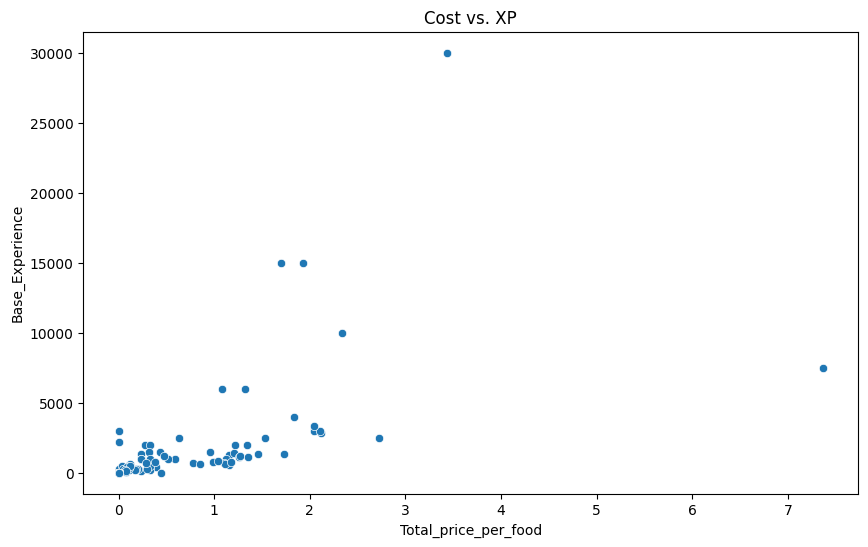

KeyError: 'Category'

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: XP per food
plt.figure(figsize=(10, 6))
sns.barplot(x='Food', y='Base_Experience', data=df_final)
plt.xticks(rotation=90)
plt.title('XP per Food')
plt.show()

# Scatter plot: Cost vs. XP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_price_per_food', y='Base_Experience', data=df_final)
plt.title('Cost vs. XP')
plt.show()

# Pie chart: Food category distribution
category_counts = df_final['Category'].value_counts()
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%')
plt.title('Food Category Distribution')
plt.ylabel('')
plt.show()